PROJECT:

## Introduction:

**The Data:** I have selected the 'noshowappointments-kagglev2-may-2016.csv' file for analysis.The data contains information on medical appointments in Brazil.

There are a number of characteristics about the patient included in each row such as the patient's medical history,whether he has diabetes,hypertension,handicap or suffers from alcoholism.The **dependent variable** in this dataset is 'No-show' as it depends on factors such as neighbourhood,handicap,SMS_received and others.All others I believe are **independent variables**.

We now begin.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We come to know that our datset has a total of 14 coloumns and a total of 110527 entries.
The dataset is not clean as we can see that there are missing entries in it.

The info() function helps us to find out if any null entries are present in the dataset.

In [7]:
df.drop(['PatientId','AppointmentID'],axis=1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


We permanently drop the coloums of patient 'PatientId'and'AppointmentID' as they wont be playing a major part in our analysis ahead.

In [8]:
list(df['Neighbourhood'].unique())

['JARDIM DA PENHA',
 'MATA DA PRAIA',
 'PONTAL DE CAMBURI',
 'REPÚBLICA',
 'GOIABEIRAS',
 'ANDORINHAS',
 'CONQUISTA',
 'NOVA PALESTINA',
 'DA PENHA',
 'TABUAZEIRO',
 'BENTO FERREIRA',
 'SÃO PEDRO',
 'SANTA MARTHA',
 'SÃO CRISTÓVÃO',
 'MARUÍPE',
 'GRANDE VITÓRIA',
 'SÃO BENEDITO',
 'ILHA DAS CAIEIRAS',
 'SANTO ANDRÉ',
 'SOLON BORGES',
 'BONFIM',
 'JARDIM CAMBURI',
 'MARIA ORTIZ',
 'JABOUR',
 'ANTÔNIO HONÓRIO',
 'RESISTÊNCIA',
 'ILHA DE SANTA MARIA',
 'JUCUTUQUARA',
 'MONTE BELO',
 'MÁRIO CYPRESTE',
 'SANTO ANTÔNIO',
 'BELA VISTA',
 'PRAIA DO SUÁ',
 'SANTA HELENA',
 'ITARARÉ',
 'INHANGUETÁ',
 'UNIVERSITÁRIO',
 'SÃO JOSÉ',
 'REDENÇÃO',
 'SANTA CLARA',
 'CENTRO',
 'PARQUE MOSCOSO',
 'DO MOSCOSO',
 'SANTOS DUMONT',
 'CARATOÍRA',
 'ARIOVALDO FAVALESSA',
 'ILHA DO FRADE',
 'GURIGICA',
 'JOANA D´ARC',
 'CONSOLAÇÃO',
 'PRAIA DO CANTO',
 'BOA VISTA',
 'MORADA DE CAMBURI',
 'SANTA LUÍZA',
 'SANTA LÚCIA',
 'BARRO VERMELHO',
 'ESTRELINHA',
 'FORTE SÃO JOÃO',
 'FONTE GRANDE',
 'ENSEADA DO SUÁ',
 'SA

In [9]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

 Neighbourhoods refer to the loaction of hospitals.
 There are different neighbourhoods where people have made appointments,maximum people's appointments are in the neighbourhood of JARDIM CAMBURI(7717) and minimum number is PARQUE INDUSTRIAL(1).
 JARDIM CAMBURI the capital of Espírito Santo is located in the southeast region of Brazil.

In [10]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

**note**: We can see '0 years' as the age, which implies that it could be the age of newborns which is usually specified in months.Also -1 could mean that it is still a foetus and the appointment could be made by an expecting mother.

In [11]:
(df[df['Age']==0])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [12]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

Highlights the fact that the number of women making appointments is way more than the men

In [13]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [14]:
df['Hipertension'].sum()

21801

In [15]:
df['Diabetes'].sum()

7943

In [16]:
df['Alcoholism'].sum()

3360

sum() function is to calculate the total number of people falling under that category.

The maximum number of patients suffer from hypertension

The number of people suffering from diabetes is twice the number of people suffering from alcoholism
throws a hint at the unhealthy lifestyle or food habits of people in the region

In [17]:
df['Scholarship'].sum()

10861

**note**:out of a total of (71840+38687) only 10,861 were given scholarship which is only 9.8265%

In [18]:
df['ScheduledDay'].value_counts()

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:17:46Z    22
2016-04-25T17:18:27Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-04T16:04:16Z     1
2016-05-09T11:10:11Z     1
2016-05-09T08:42:31Z     1
2016-04-01T08:17:55Z     1
2016-05-06T10:35:25Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

as we can see the maximum number that is 24 of the appointments were scheduled on 2016-05-06T07:09:54Z

In [19]:
df['AppointmentDay'].value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

As we can see  maximum number of appointments were made in the month of june and towards the end of may.
Also it could serve as an indication that some major event could have occured in those months which led to a spike in the need for medical attention 
*note*: We can see from the coloumn 'Age' that majority people fall under the 0 years bracket, this is an indication that they are newly born children whose age is in months.

On research it was found that:
>ZIKV was considered a benign disease until October 2015, when a sharp increase in the number of neonates born with microcephaly, a rare condition associated with incomplete brain development, was observed in maternity services in Northeast Brazil. Specialists from Recife raised the hypothesis of an association between ZIKV infection in pregnancy and microcephaly. The Brazilian Ministry of Health then established compulsory notification of microcephaly. On 12 November 2015, the Ministry of Health declared a national public health emergency. On 1 February 2016, the World Health Organization (WHO) declared Zika a public health emergency of international concern. At the time, there was no direct scientific evidence of a causal relationship between ZIKV infection during pregnancy and congenital brain defects in fetuses or newborns, although the spatial diffusion of the microcephaly epidemic followed the ZIKV spread paths from an epicentre in the Northeast region towards the south and west in rapid succession.


>Brazil, more than 200,000 cases were notified by the end of 2016. Secondly, the high reach of the unified public health system, including hospitals in which more than 80% of babies are delivered. The public health obstetricians and neonatologists within this community, dealing with hundreds of childbirths per month, were the first to suspect something was amiss. Thirdly, the close network of practitioners and researchers working within the public health system, including doctors, midwives, epidemiologists, and other academics exchanging information and reporting new findings in a timely fashion. From November 2015, reports of suspected microcephaly cases increased 10-fold within just a few weeks. 

<img src = "lol.PNG">


## Question1
What is the reation between **age** and **alcoholism**?


In [20]:
x= df[df['Age']<40]
print("out of {} people under the age of 40, {} have diabetes".format(len(x),x['Diabetes'].sum()))


out of 59282 people under the age of 40, 513 have diabetes


In [21]:
x= df[df['Age']<40]
print("out of {} people under the age of 40, {} have hypertension".format(len(x),x['Hipertension'].sum()))


out of 59282 people under the age of 40, 1599 have hypertension


In [22]:
x= df[df['Age']<40]
print("out of {} people under the age of 40, {} have alcoholism".format(len(x),x['Alcoholism'].sum()))


out of 59282 people under the age of 40, 696 have alcoholism


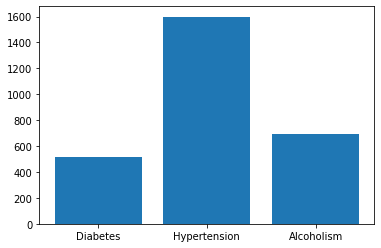

In [23]:
l1=['Diabetes','Hypertension','Alcoholism']
l2=[x['Diabetes'].sum(),x['Hipertension'].sum(),x['Alcoholism'].sum()]
plt.bar(l1,l2)
plt.show();

***Inference***: We did a comparative study of the number of people suffering from diabetes,hypertension and alcoholism.
It can be inferred that people under the 40 age suffering from hypertension is the highest indicating that he stress levels are very high among people,alcoholism is the next,followed by diabetes.
It could mean that people have healthy eating habits however they may have stress due to work or other reasons.

## Question 2
a) The number of men vs women who received the scholarship
b) Who has a better chance of getting a scholarship? 
   1) Men or Women
   2) Age group of men and women most likely to get the scholarship

In [24]:
df_s=df[df['Scholarship']==1]

In [25]:
df_s['Gender'].value_counts()

F    8853
M    2008
Name: Gender, dtype: int64

***Inference a)***: The number of men who have received the scholarship are 2008 and women are 8853.
The number of women is four times as that of men.Thus the chances of getting a scholarship are better for women.

In [26]:
ages = df_s['Age'].value_counts()
ages

38    292
37    281
34    259
32    252
5     248
     ... 
82      2
77      2
80      1
84      1
79      1
Name: Age, Length: 84, dtype: int64

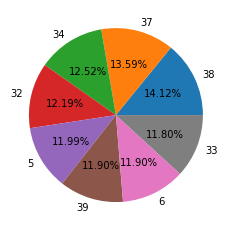

In [27]:
ages = df_s['Age'].value_counts()
age_cut=[]
for i in list(ages.index):
    if ages[i] >=240:
        age_cut.append(i)
ages = ages[age_cut]
plt.pie(ages,labels = list(ages.index),autopct='%1.2f%%')
plt.show()

We can see that maximum percentage of women who have got the scholarship lie in age group of 38 years.
Thus women in their late thirties are more likely to get the scholarship.

In [28]:
df_s_m = df_s[df_s['Gender']=='M']
df_s_f = df_s[df_s['Gender']=='F']

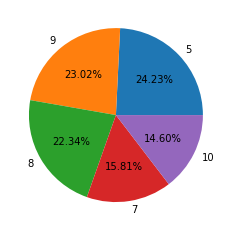

In [29]:
ages_m = df_s_m['Age'].value_counts()
age_cut=[]
for i in list(ages_m.index):
    if ages_m[i] >80:
        age_cut.append(i)
ages = ages_m[age_cut]
plt.pie(ages,labels = list(ages.index),autopct='%1.2f%%')
plt.show()

We can see that maximum percentage of men who have got the scholarship lie in age group of 5 years.
Thus men in their chilhood are more likely to get the scholarship.

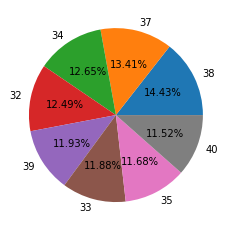

In [30]:
ages_f = df_s_f['Age'].value_counts()
age_cut=[]
for i in list(ages_f.index):
    if ages_f[i] >225:
        age_cut.append(i)
ages = ages_f[age_cut]
plt.pie(ages,labels = list(ages.index),autopct='%1.2f%%')
plt.show()

## Question 3
a)Neighbourhoods vs Appointments
b)Neighbourhoods vs Show-up


In [31]:
def visualise_app(df):    
    l1=list(df['Neighbourhood'].value_counts())[:20]
    l_n=list(df['Neighbourhood'].value_counts().index)[:20]
    plt.figure(figsize=(20,20))
    plt.bar(l_n,l1)
    plt.show();

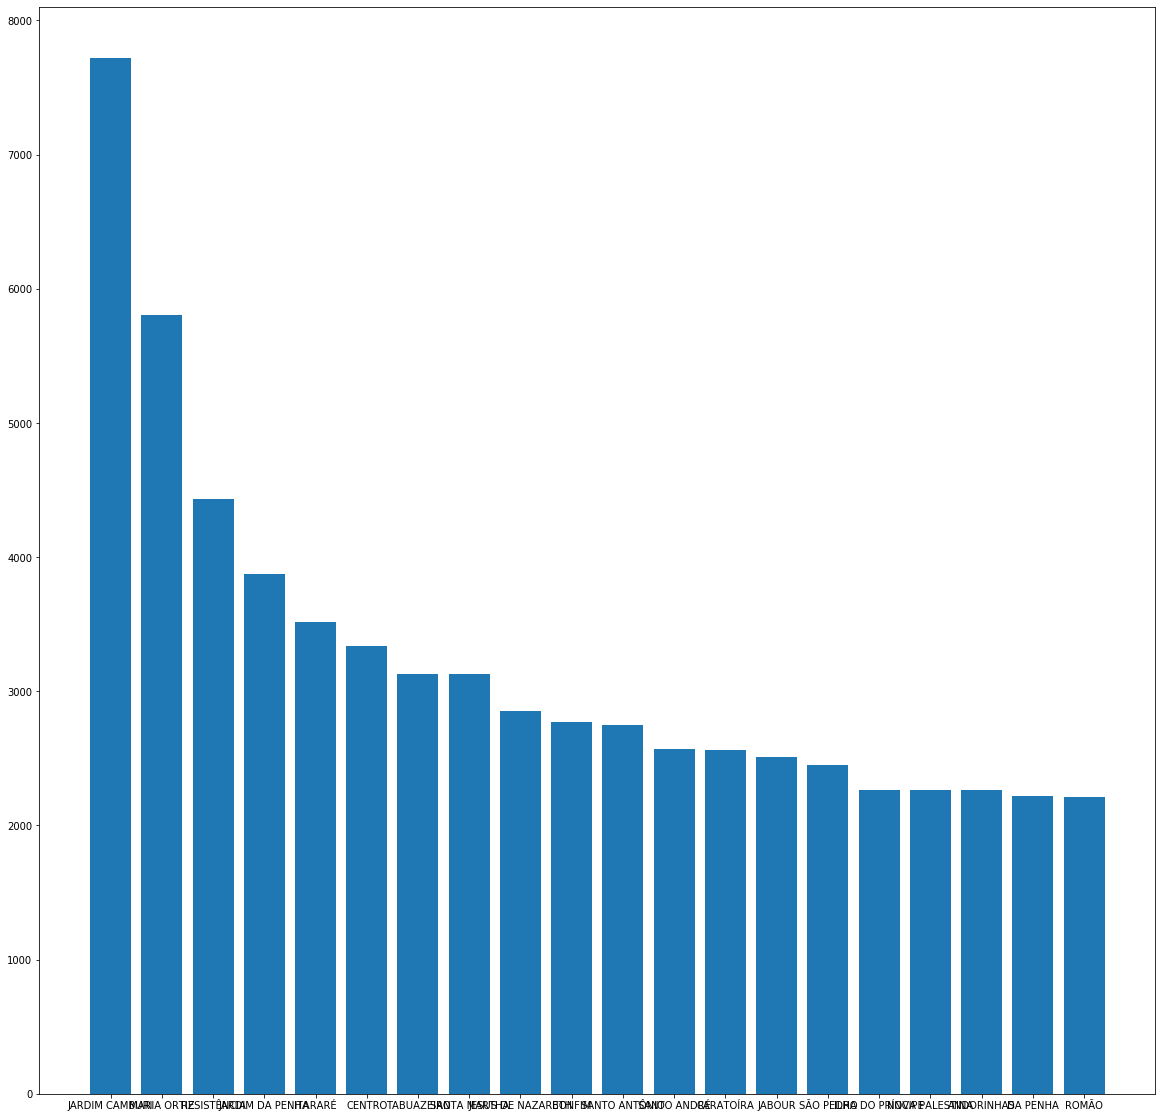

In [32]:
visualise_app(df)

In [33]:
l1=list(df['Neighbourhood'].value_counts())[:20]
l_n=list(df['Neighbourhood'].value_counts().index)[:20]
df_su = df[df['No-show']=='No']
l2=list(df_su['Neighbourhood'].value_counts())[:20]
l_n_2=list(df_su['Neighbourhood'].value_counts().index)[:20]
print(l_n==l_n_2)

False


NOw that the lists are not equal, lets see were the mismatch is

In [34]:
for i in range(20):
    if(l_n[i]!= l_n_2[i]):
        print(i)
        print(l_n[i],"----",l_n_2[i])

4
ITARARÉ ---- SANTA MARTHA
6
TABUAZEIRO ---- ITARARÉ
7
SANTA MARTHA ---- TABUAZEIRO
8
JESUS DE NAZARETH ---- SANTO ANTÔNIO
10
SANTO ANTÔNIO ---- JESUS DE NAZARETH
12
CARATOÍRA ---- JABOUR
13
JABOUR ---- CARATOÍRA
15
ILHA DO PRÍNCIPE ---- NOVA PALESTINA
16
NOVA PALESTINA ---- DA PENHA
18
DA PENHA ---- ROMÃO
19
ROMÃO ---- ILHA DO PRÍNCIPE


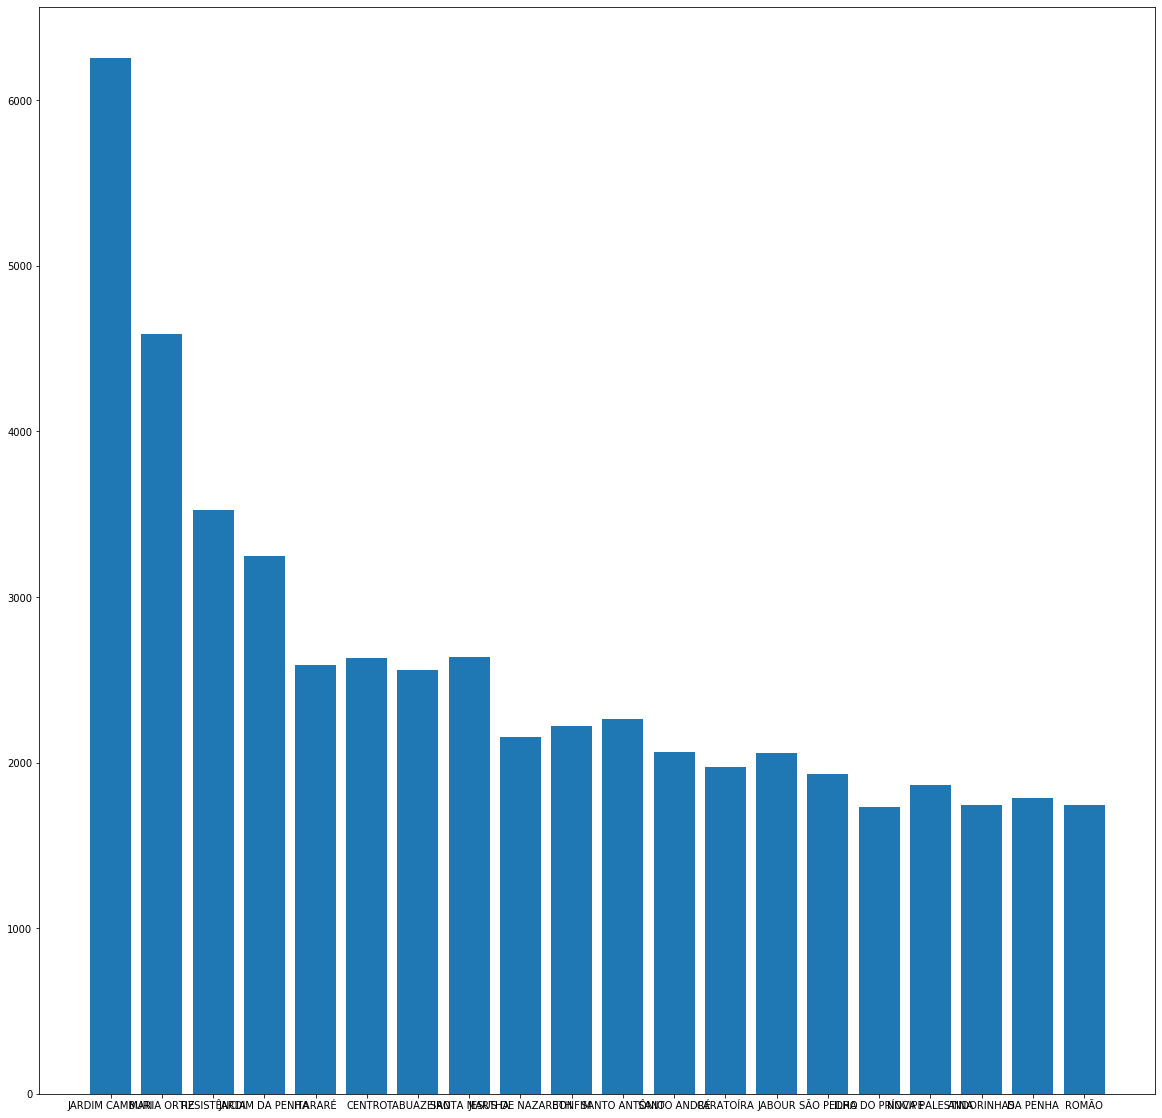

In [48]:
y1 = []
a = df_su['Neighbourhood'].value_counts()[:20]
for i in l_n:
    y1.append(a[i])
plt.figure(figsize= (20,20))
plt.bar(l_n,y1)
plt.show();

We have taken the first twenty neighbourhoods inorder to make it easier for us to find out as to which hospital is actually good.
>A hospital where huge number of appointments are made but the people dont show up will rank below the one where the number of appointments made and patients turning up match.

> For instance the 6th hospital ranks higher than the 5th,8th higher than 7th indicating that the appointment to show up ratio was better in 6th and 8th, making them better hospitals in comparison to 5th and 7th.


## Question 4
a)How many  did not receive the message and did not show up?
b)How many  did not receive the message and still showed up?
c)How many received the message and did not show up?
d)How many received the message and showed up?


In [35]:
m=np.zeros((2,2))
m[0][0]+=1
print(m)

[[1. 0.]
 [0. 0.]]


In [36]:
df['No-show'].replace('No',1,inplace=True)
df['No-show'].replace('Yes',0,inplace=True)

In [37]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [38]:
def get_matrix(df):
    m=np.zeros((2,2))
    for i in list(df.index):
        if((df['SMS_received'][i]==0) and (df['No-show'][i]==0)):
            m[0][0]+=1
        elif((df['SMS_received'][i]==0) and (df['No-show'][i]==1)):
            m[0][1]+=1
        elif((df['SMS_received'][i]==1) and (df['No-show'][i]==0)):
            m[1][0]+=1
        elif((df['SMS_received'][i]==1) and (df['No-show'][i]==1)):
            m[1][1]+=1
    return m

In [39]:
m_t=get_matrix(df) 
print(m_t)

[[12535. 62510.]
 [ 9784. 25698.]]


In [40]:
#checking for alcoholics:
df_a = df[df['Alcoholism']==1]
m_alc=get_matrix(df_a)
print(m_alc)

[[ 400. 2113.]
 [ 277.  570.]]


In [41]:
#checking for hypertension
df_h=df[df['Hipertension']==1]
m_hpt=get_matrix(df_h)
print(m_hpt)

[[ 2227. 12704.]
 [ 1545.  5325.]]


In [42]:
#checking for handicap
df_hp=df[df['Handcap']==1]
m_hdp=get_matrix(df_hp)
print(m_hdp)

[[ 240. 1313.]
 [ 126.  363.]]


In [43]:
#checking for diabetics
df_db=df[df['Diabetes']==1]
m_db=get_matrix(df_db)
print(m_db)


[[ 886. 4701.]
 [ 544. 1812.]]


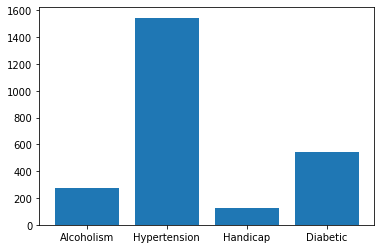

In [44]:
y1=[m_alc[1][0],m_hpt[1][0],m_hdp[1][0],m_db[1][0]]
x1=['Alcoholism','Hypertension','Handicap','Diabetic']
plt.bar(x1,y1)
plt.show();

In [45]:
 print(len(df))

110527


***Inference:*** 
 Out of the total number of people:
>a)The number of people who didnt recieve a message and didn't show up are:12,535

>b)The number of people who didn't recieve a message and yet showed up are:62,510

>c)The number of people who recieved a message and didn't show up are:9,784

>d)The number of people who recieved a message and showed up are:25,698


Thus we can make out maximum people fall in the category "{b}"


Also double the number of people showed up when they were sent a message before their appointment.

It is important to note that despite not receiving the SMS, a considerably large amount of people(62,510) showed up for their appointment.
This means that SMS has an effect but not that drastic and sending the SMS is an important factor but not necessarily an essential one for people to show up.

**Now we will try to establish a link between how message beforehand affected people suffering from:
      a)Alcoholism
      b)Hypertension
      c)Handicap
      d)Diabetic**
      
 It can be inferred from the bar graph that the when sent a prior message the people having hypertension, have the maximum numbers for not showing up at their appointment.It could imply that seeing the reminder message makes them tensed or anxious because of which they do not show up at the hospital.
    

# **Conclusion:**

As we went on analysing the dataset, we came across several key discoveries:

1) Age '0' and '-1' seemed odd at first but it was then concluded to be the age of newly born children and the children still in their mother's womb,also explaining why the number of females who made the appointments were more as compared to men, indicating that a large number of mothers with newly born infants were largely making the appointments.

2) Observing we could see that maximum number of appointmemts were made towards the end of May and at the start of June.

This could be traced back to the ***ZIKA VIRUS EPIDEMIC*** that was on its rise in Brazil in the year 2016.
This virus had affected a majority of women and the newly born.Thus confirming our reasoning behind the appointments falling in the '0'and '-1' years category.

The questions asked also helped us to establish a link between several factors:
a)AGE AND DISEASE: **Hypertension** was something majority of people suffered from below the age of 40.
The number of people suffering from **Diabetes** was twice that of **Alcoholism**.
Stress is one of the root causes for both Hypertension and Diabetes, in addition to unhealthy eating habits.
It means that people suffer from a lot of stress and follow an unhealthy diet.

b)SCHOLARSHIP CHANCES FOR MEN AND WOMEN: Women had a greater chance of getting the scholarship as compared to men.
Among women the chances of getting a scholarship are highest for middle aged women specifically of the age'38 years'.
Among men the chances of getting a scholarship are higher for young boys aged around '5 years'.

c)APPOINTMENT AND SHOW UP:



d)MESSAGE,SHOW-UP AND HOW THEY ARE RELATED BASED ON HEALTH CONDITION OF PATIENT:
We could conclude that message is an important but not an essential parameter for determining if a patient will show up at his/her appointment.Since the maximum people out of the total who showed up had not received any message.

However double number of people showed up when sent a prior message as compared to those who showed up without a prior message.

Infact at times sending a message had detrimental effects on people with hypertension.Despite receiving the message a large number of people with hypertension did not show up,it could be the anxiety or tension that may have caused them to do so.




**Difficuties that had to be dealt with while handling the dataset:**

>To eliminate the coloumns containing patient id and appontment id as they were not crucial for answering important questions related to our analysis.

>To understand what ages '0' and '-1' years implied.

>To gauge the number of people who showed up we had to replace 'No' with 1 and 'Yes' with 0 in the No-show coloumn.

>The dataset has large number of values(about 81 neighbourhoods) thus for the sake of convenience, only first 20 neighbourhoods were plotted on the graph to help draw conclusions.






**Can the inferences drawn at each stage be applicable to the whole of Brazil?**
> NO, the inferences are applicable only to the 81 neighbourhoods whose records we have analyzed in our dataset.
The dataset isn't big enough or having sufficient variables to draw conclusions about the whole of Brazil.


**Can the inferences drawn at each stage be applicable all around the year?**
>NOT NECESSARILY,we saw that the time 2015-2016 was when there was a rise in Zika Virus epidemic in Brazil.The appointments made may vary all year round and the majority may not necessarily be infants.

**Can the inferences drawn be applicable in real life?**
>Inference that suggested hypertension people do not show up due to anxiety, when they receive a prior message could hold true in the real life scenario as well.